# **Predicting Walmart Sales using Machine Learning**
![](https://i.imgur.com/al16kv3.png)

Walmart is an American Retail, Wholesale and E-commerce business. Sam Walton founded Walmart in 1962 in Rogers, Arkansas. His goal was to help people "Save Money and Live Better" which continues to be Walmart's guiding mission with "Every Day Low Prices(EDLC)" and great service.

In this notebook we will explore Supervised Machine Learning methods.


- Download the Dataset
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="machine-learning-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pankajthakur3999/machine-learning-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pankajthakur3999/machine-learning-project


'https://jovian.ai/pankajthakur3999/machine-learning-project'

Dataset url = https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data

## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install Required Libraries

In [ ]:
!pip install numpy pandas opendatasets scikit-learn --quiet

### Download data from Kaggle

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data'

In [ ]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in "./walmart-recruiting-store-sales-forecasting" (use force=True to force download)
CPU times: user 896 µs, sys: 0 ns, total: 896 µs
Wall time: 694 µs


In [ ]:
data_dir = './walmart-recruiting-store-sales-forecasting'

### View Dataset Files

In [ ]:
import pandas as pd
from zipfile import ZipFile
import os

In [ ]:
!ls -lh

total 8.0K
drwxr-xr-x 1 root root 4.0K Oct 28 13:37 sample_data
drwxr-xr-x 2 root root 4.0K Nov  6 17:36 walmart-recruiting-store-sales-forecasting


In [ ]:
os.listdir(data_dir)

['features.csv.zip',
 'sampleSubmission.csv',
 'train.csv',
 'train.csv.zip',
 'sampleSubmission.csv.zip',
 'test.csv',
 'test.csv.zip',
 'features.csv',
 'stores.csv']

#### Extracting dateset

In [ ]:
# Helper function to unzip many ".zip" files in a directory

from zipfile import ZipFile

def unzip_files(path):
    
    # Get list of files in the directory
    files = os.listdir(path)
    
    for file in files:                                   #For each file in the directory
        
        if file.endswith(".zip"):                        # if it is a ".zip" file
            file_path = path+"/"+file                    # get location of the file
            
            with ZipFile(file_path,"r") as zip_file:     #Open the ".zip" file in read mode
                zip_file.extractall(path)                #extract all files in ".zip" in the location
    
    return     

In [ ]:
#unzip all ".zip" files
unzip_files(data_dir)

os.listdir("walmart-recruiting-store-sales-forecasting")

['features.csv.zip',
 'sampleSubmission.csv',
 'train.csv',
 'train.csv.zip',
 'sampleSubmission.csv.zip',
 'test.csv',
 'test.csv.zip',
 'features.csv',
 'stores.csv']

In [ ]:
import glob

glob.glob(data_dir+"/"+"*.csv")

['./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv',
 './walmart-recruiting-store-sales-forecasting/train.csv',
 './walmart-recruiting-store-sales-forecasting/test.csv',
 './walmart-recruiting-store-sales-forecasting/features.csv',
 './walmart-recruiting-store-sales-forecasting/stores.csv']

In [ ]:
train_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv')
test_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv')
stores_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
features_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv')
submission_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv')

### Load training set with Pandas

In [ ]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [ ]:
train_df.astype('object').describe().transpose()

,count,unique,top,freq
Store,421570,45,13,10474
Dept,421570,81,1,6435
Date,421570,143,2011-12-23,3027
Weekly_Sales,421570.0,359464.0,10.0,353.0
IsHoliday,421570,2,False,391909


In [ ]:
train_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Observations about training data:

- There is 421570 rows and 5 columns
- No missing data
- `Store` ranges from 1 to 45
- `Dept` ranges from 1 to 99
- `Weekly_Sales` ranges from -4988.94 to 	693099.36.

### Test Set

In [ ]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


Some observations about the test set:

- There is 115064 rows and 4 columns
- `Store` ranges from 1 to 45
- `Dept` ranges from 1 to 99


In [ ]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


#### Merge store and features into train and test data

In [ ]:
raw_df = pd.merge(train_df, features_df, how = 'inner' ,on = ['Store','Date','IsHoliday']).sort_values(
by=['Store','Dept','Date']).reset_index(drop=True).merge(stores_df, on='Store',how='inner')

In [ ]:
test_df = pd.merge(test_df, features_df, how = 'inner' ,on = ['Store','Date','IsHoliday']).sort_values(
by=['Store','Dept','Date']).reset_index(drop=True).merge(stores_df, on='Store',how='inner')

In [ ]:
raw_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
raw_df['Date'] = pd.to_datetime(raw_df['Date'])
raw_df['Week'] = raw_df['Date'].dt.week
raw_df['Year'] = raw_df['Date'].dt.year
raw_df['Month'] = raw_df['Date'].dt.month
raw_df['Day'] = raw_df['Date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Week'] = test_df['Date'].dt.week
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/machine-learning-project


'https://jovian.ai/pankajthakur3999/machine-learning-project'

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:


In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/machine-learning-project


'https://jovian.ai/pankajthakur3999/machine-learning-project'

### Data Description

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week
test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [ ]:
avgweeklysales = raw_df.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Avergae Sales - Per Store",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

Insights:
In terms of sales, type A stores are superior than other two types

### Temperature vs Sales

In [ ]:
px.scatter(raw_df.sample(2000), x='Temperature',y='Weekly_Sales')

Insights:
There seems to be no relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

### Fuel_Price vs Sales

In [ ]:
px.scatter(raw_df.sample(2000), x='Fuel_Price',y='Weekly_Sales')

Insights:
Between fuel price and the sales there doesn't seem to exist any clear relationship

In [ ]:
px.scatter(raw_df.sample(2000), x='Fuel_Price',y='Weekly_Sales')

### Holiday vs Sales

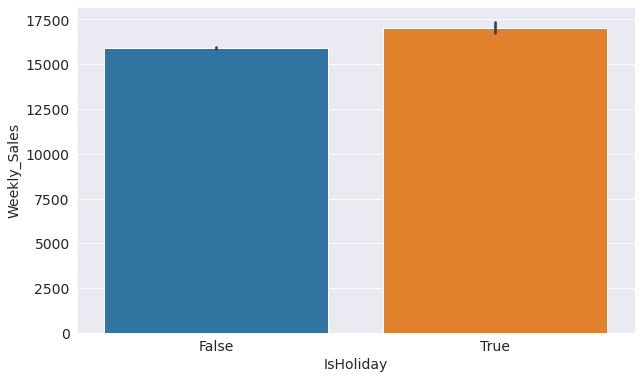

In [ ]:
sns.barplot(data=raw_df, x='IsHoliday', y='Weekly_Sales')

Insights:
From the chart we can see there is more sales on holiday than usual days

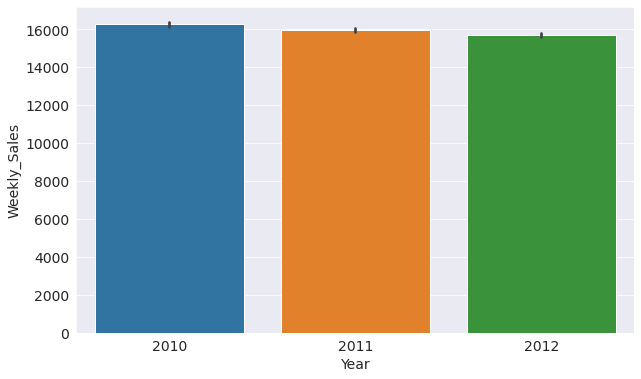

In [ ]:
sns.barplot(data=raw_df, x='Year', y='Weekly_Sales')

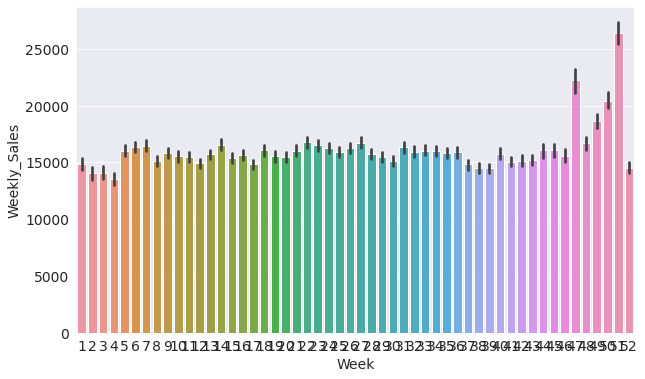

In [ ]:
sns.barplot(data=raw_df, x='Week', y='Weekly_Sales')

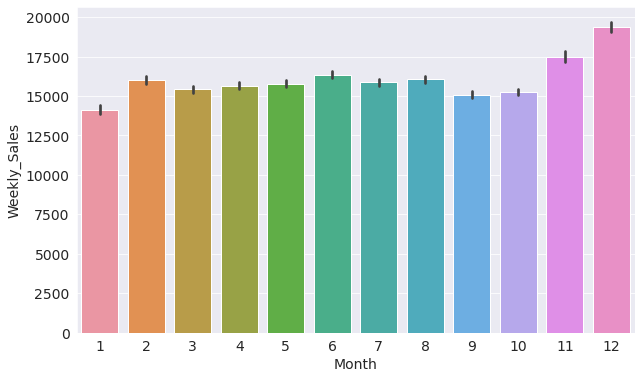

In [ ]:
sns.barplot(data=raw_df, x='Month', y='Weekly_Sales')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/machine-learning-project


'https://jovian.ai/pankajthakur3999/machine-learning-project'

### Extract Inputs and Outputs

In [ ]:
raw_df = raw_df.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

test_df = test_df.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

In [ ]:
# Identify input and target columns

input_cols = raw_df.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = raw_df[input_cols].copy()
targets = raw_df[target_col].copy()

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
# Scale the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [ ]:
# Create training and validation sets

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

### Evaluation
The competition is evaluated on the weighted mean absolute error(WMAE), so we will define a function which calculates this error for the evaluation of different machine learning models
![](https://i.imgur.com/Yzk3dow.png)

In [ ]:
# Define the function to evaluate the models

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

### Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you. 

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression().fit(X_train, train_targets)

# Generate predictions on training data
train_preds = model.predict(X_train)

# Compute WMAE on traing data
train_wmae = WMAE(X_train, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(X_val)

# Compute WMAE on validation data
val_wmae = WMAE(X_val, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))

The WMAE loss for the training set is  15867.95.
The WMAE loss for the validation set is  15995.4.


## Decisison Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on traing data
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is  {}.'.format(tree_train_wmae))


# Compute WMAE on validation data
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(tree_val_wmae))

The WMAE loss for the training set is  13886.47.
The WMAE loss for the validation set is  14595.64.


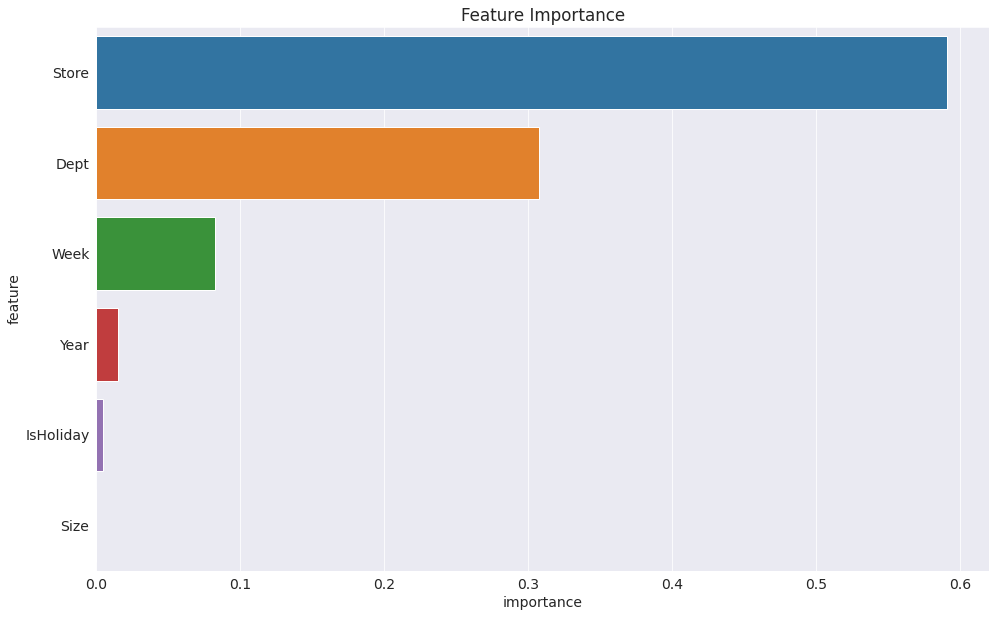

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  13065.94.
The WMAE loss for the validation set is  13967.86.


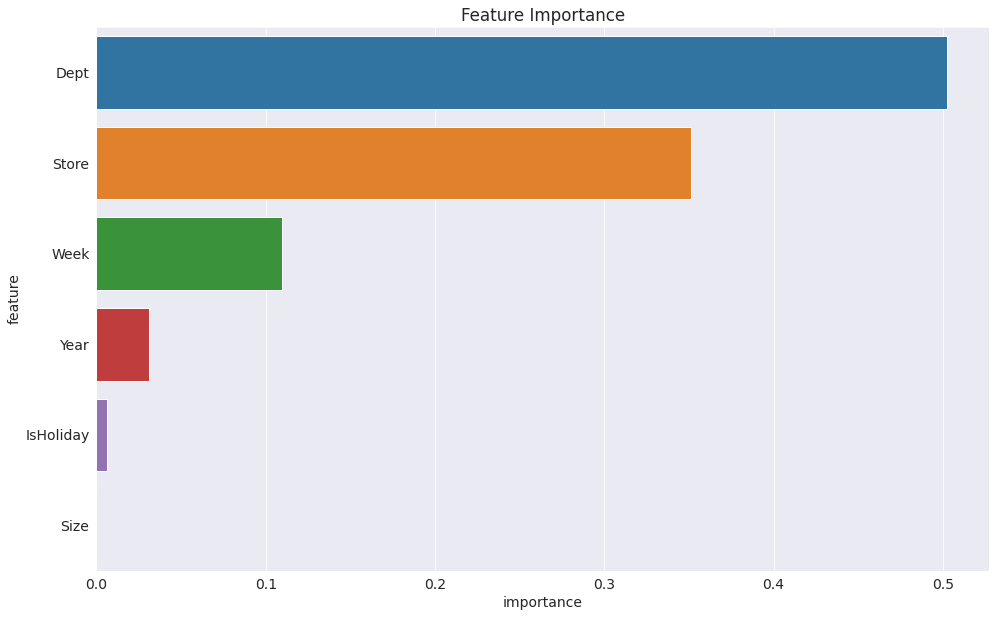

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

## Tunning of Random Forest
Let's define two functions which assist the tuning of hyper parameters.

'test_params' takes the parameters of Random Forest and train the model. After that it make predictions of the training and validation and return weighted mean averaged error for the traing and validation data.

'test_param_and_plot' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [ ]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

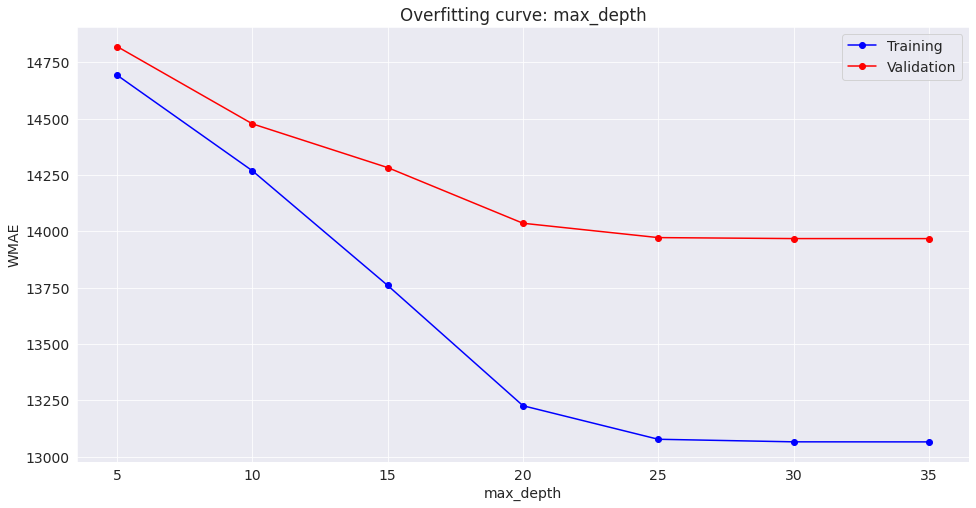

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

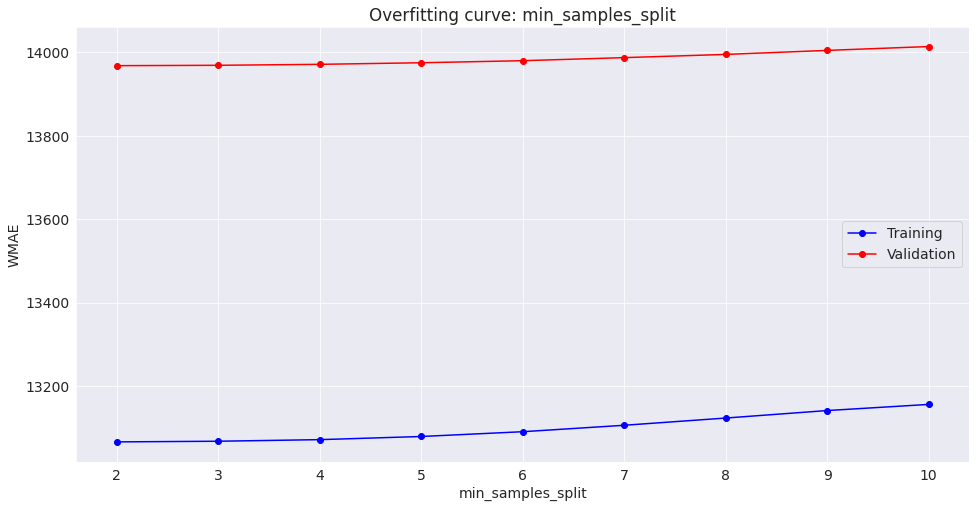

In [ ]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

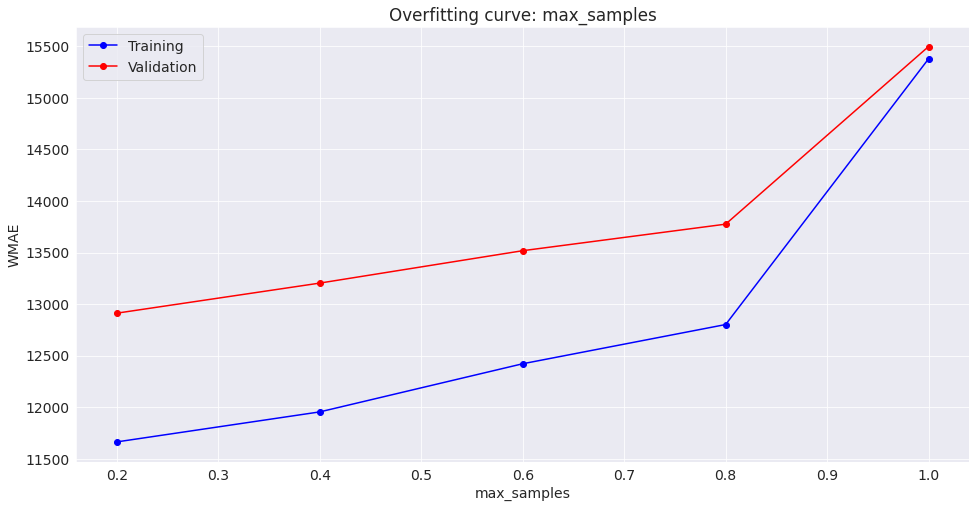

In [ ]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 30

min_samples_split: 2

max_samples: 0.8

These parameters were tuned one at a time but they are somehow interrelated and effect eachother but from this I got a rough idea where the optimal values lie. Further after simultaneously varying the parameters by making some educated guesses, I found the following parameters which give better performance than the untuned base model

max_depth: 30

min_samples_split: 2

max_samples: 0.95

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, max_depth=30, min_samples_split=2, max_samples=0.95,  random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  13064.13.
The WMAE loss for the validation set is  13963.6.


## Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [ ]:
test_preds = rf1.predict(test_df)
test_df['Weekly_Sales'] = test_preds

In [ ]:
submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv')
submission['Weekly_Sales'] = test_preds
submission.to_csv('submission.csv',index=False)

![](https://i.imgur.com/aJ7pNJD.png)

## Conclusion

- In terms of sales, type A stores are superior than other two types
- we can see there is more sales on holiday than usual days
- There seems to be no relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship
- Between fuel price and the sales there doesn't seem to exist any clear relationship

## References

- Linear Regression with Scikit-Learn [Jovian Aakash N S ](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/linear-regression-with-scikit-learn)  
- How to approach Machine Learning Problems [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems)   
 
- Scikit Learn Supervised Learning [documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) 
- Kaggle.com

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>